<a href="https://colab.research.google.com/github/Yuriferr/Machine-Learning-Mamografia/blob/main/Apendizado_n%C3%A3o_Supervinsionado_Segmenta%C3%A7%C3%A3o_de_Imagens_de_C%C3%A2ncer_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Para processar arquivos e imagens
from PIL import Image
import glob
import numpy as np

# Para plotar imagens
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.cluster import KMeans # Agrupamento

In [30]:
# Carregando as imagens

img_A = mpimg.imread('mdb021.pgm')
img_B = mpimg.imread('mdb022.pgm')
img_C = mpimg.imread('mdb023.pgm')
img_D = mpimg.imread('mdb025.pgm')

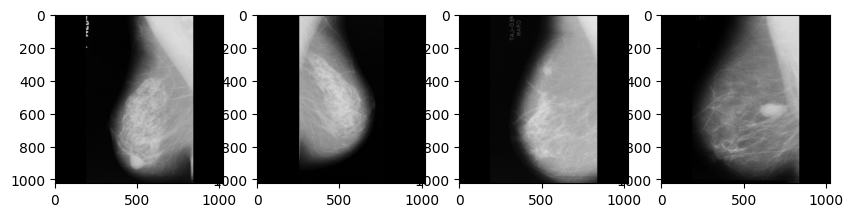

In [31]:
# Plotando as imagens

fig, axs = plt.subplots(1, 4, figsize=(10, 4))
im1 = axs[0].imshow(img_A, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_B, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_C, cmap='gray', vmin=0, vmax=255)
im4 = axs[3].imshow(img_D, cmap='gray', vmin=0, vmax=255)
plt.show()

In [32]:
# Essa função usa o Kmeans como um filtro de segmentação de imagem

def filtro_kmeans(img, clusters):
    vectorized = img.reshape((-1,1))
    kmeans = KMeans(n_clusters=clusters, random_state = 0, n_init=5)
    kmeans.fit(vectorized)

    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]

    segmented_image = segmented_data.reshape((img.shape))
    return(segmented_image)

In [33]:
clusters = 5

img_A_segmentada = filtro_kmeans(img_A, clusters)
img_B_segmentada = filtro_kmeans(img_B, clusters)
img_C_segmentada = filtro_kmeans(img_C, clusters)
img_D_segmentada = filtro_kmeans(img_D, clusters)

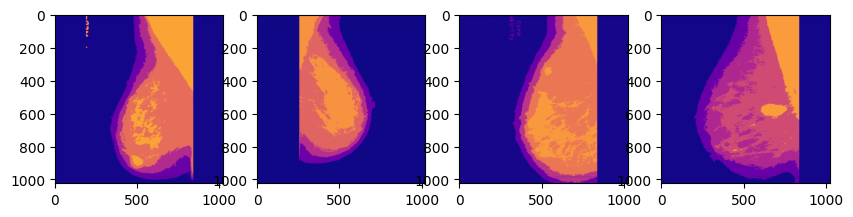

In [35]:
fig, axs = plt.subplots(1, 4, figsize=(10, 4))
im1 = axs[0].imshow(img_A_segmentada, cmap='plasma', vmin=0, vmax=255)
im2 = axs[1].imshow(img_B_segmentada, cmap='plasma', vmin=0, vmax=255)
im3 = axs[2].imshow(img_C_segmentada, cmap='plasma', vmin=0, vmax=255)
im4 = axs[3].imshow(img_D_segmentada, cmap='plasma', vmin=0, vmax=255)
plt.show()